# In this study of mice who were identified with SCC tumors and received treatment, we discovered the following observations.
1. In this study, Capomulin was the drug of choice that was used to compare performance against other drugs of interest. From the data below, we can see that when Capomulin was registered, it had some of the lowest mean and median tumor volume. One can conclude from the data that Capomulin may have been effective in shrinking the cancer tumor than Infubinol and Ceftamin.
2. Looking at the boxplot analysis where the distribution of final tumor volumes across different drug regimens is observed, we notice that the interquartile range, which is the distance between the first and third quartiles, is smaller for Capomulin and Ramicane. This indicates that the mice who were treated with this drug had a more consistent response and shows the efficay and effectiveness of the drug.
3. The correlation coefficient of 0.84 shows that there is a strong positive correlation between mouse weight and average tumor volume. The red regression line plotted through the data points shows the general trend of this relationship. The absence of outliers indicates a consistent relationship across the dataset. The analysis could be clinically significant to the executive team as it suggests that weight may be a factor in the effectiveness of hte Capomulin treatment  or may be related to the progression of the disease. In other words, the above analysis and the below results may warrant further investigation in the impact of mouse weight on treatment outcomes and it remains to be seen whether weight management could play a role in enhancing the efficacy of cancer treatments like Capomulin.  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path

In [2]:
# Load the CSV file
school_data_to_load = Path("Resources/Mouse_metadata.csv")
student_data_to_load = Path("Resources/study_results.csv")

In [3]:
# storing data into pandas dataframes
Mouse_metadata_data_file = 'Mouse_metadata.csv'
study_results_data_file = 'study_results.csv'
Mouse_metadata_data_df = pd.read_csv(Mouse_metadata_data_file)
study_results_data_df = pd.read_csv(study_results_data_file)

In [4]:
# Combine the DataFrames on the "Mouse ID" column into a single dataframe
merged_data = pd.merge(Mouse_metadata_data_df, study_results_data_df, on="Mouse ID")

# Display the first few rows of the merged DataFrame for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Count the number of unique mice
number_of_mice = merged_data['Mouse ID'].nunique()

# Print the number of unique mice
print("Number of unique mice:", number_of_mice)

Number of unique mice: 249


In [6]:
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Display the duplicate rows
duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
array_data = merged_data.to_numpy()

duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

# Convert the duplicates DataFrame to a NumPy array
duplicates_array = duplicates.to_numpy()

# Display the array of duplicates
duplicates_array

array([['g989', 'Propriva', 'Female', 21, 26, 0, 45.0, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 5, 47.57039208, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 10, 49.8805278, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 15, 53.44201976, 0],
       ['g989', 'Propriva', 'Female', 21, 26, 20, 54.65765008, 1]],
      dtype=object)

In [8]:
# Identify duplicate rows based on 'Mouse ID' and 'Timepoint'
duplicate_rows = merged_data[merged_data.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

# Get the IDs of duplicate mice
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

# Filter the DataFrame to include only data for the duplicate mice
data_for_duplicate_mice = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

# Display the data for duplicate mice
print("Data for Duplicate Mouse IDs:")
data_for_duplicate_mice

Data for Duplicate Mouse IDs:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
duplicates = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Selecting the desired columns
duplicates_filtered = duplicates[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]
duplicate_mouse_ids = duplicate_rows['Mouse ID'].unique()

# Output the information as a table
duplicates_filtered

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [10]:
# Drop the duplicate entries based on 'Mouse ID' and 'Timepoint'
cleaned_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])

# Display the cleaned DataFrame
print(cleaned_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [11]:
# Count the number of unique mice in the cleaned DataFrame
unique_mice_count_cleaned = cleaned_data['Mouse ID'].nunique()

# Print the number of unique mice
print("Number of unique mice in the clean DataFrame:", unique_mice_count_cleaned)

Number of unique mice in the clean DataFrame: 249


In [12]:
# Generating a summary statistics table of tumor volume for each drug regimen

# Grouping by 'Drug Regimen'
grouped_by_regimen = cleaned_data.groupby('Drug Regimen')

# Calculating statistics
mean_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_by_regimen['Tumor Volume (mm3)'].sem()

# Assembling the results into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume
})
print(summary_statistics)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

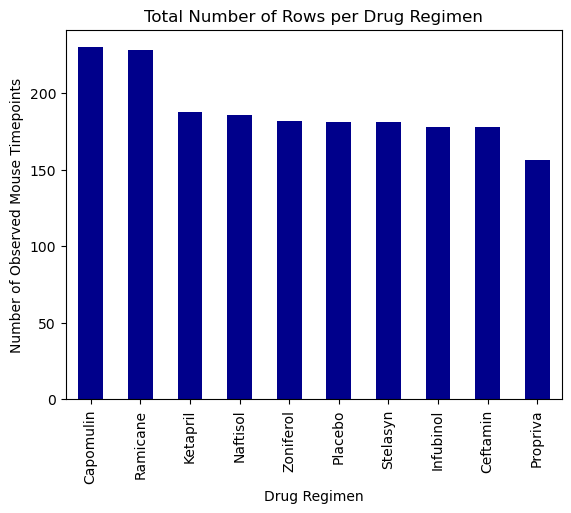

In [13]:
import matplotlib.pyplot as plt

# Counting the total number of rows (Mouse ID/Timepoints) for each drug regimen
count_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Generating a bar plot using Pandas
bar_plot = count_per_regimen.plot(kind='bar', color='darkblue', title='Total Number of Rows per Drug Regimen')

# Setting the labels for the plot
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Observed Mouse Timepoints")

# Displaying the plot
plt.show()

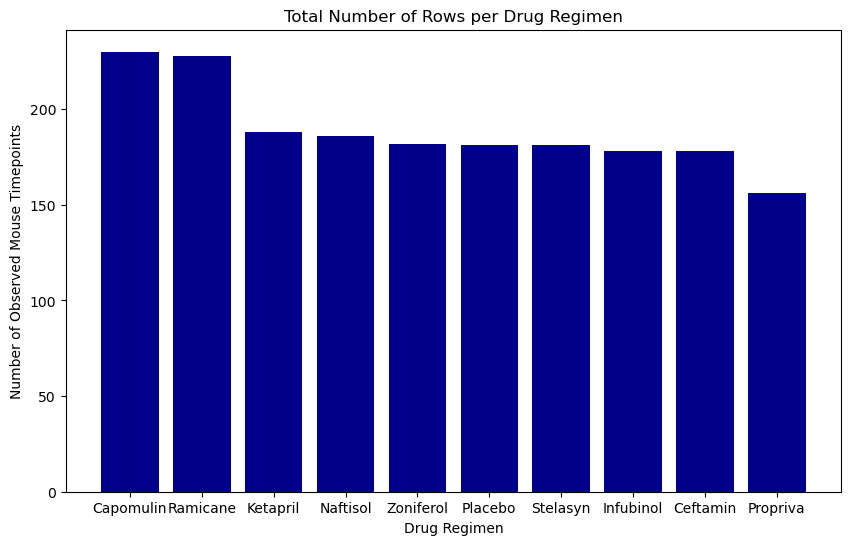

In [14]:
# Using Matplotlib's pyplot to generate a bar plot

# Counting the total number of rows (Mouse ID/Timepoints) for each drug regimen
count_per_regimen = cleaned_data['Drug Regimen'].value_counts()

# Setting up the plot
plt.figure(figsize=(10,6))
plt.bar(count_per_regimen.index, count_per_regimen.values, color='darkblue')

# Adding title and labels
plt.title('Total Number of Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Displaying the plot
plt.show()

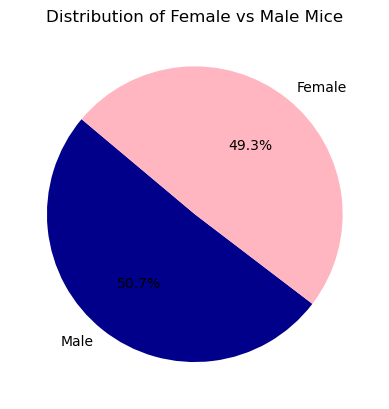

In [15]:
# Generating a pie plot for the distribution of female versus male mice using Pandas

# Counting the number of female and male mice
sex_distribution = cleaned_data['Sex'].value_counts()

# Generating a pie plot
pie_plot = sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'], title='Distribution of Female vs Male Mice')

# Setting the ylabel to blank to remove 'Sex' label for better aesthetics
pie_plot.set_ylabel('')

# Displaying the plot
plt.show()

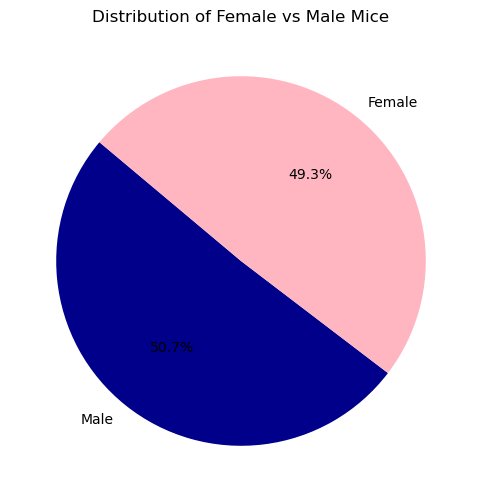

In [16]:
# Generating a pie plot for the distribution of female versus male mice using pyplot

# Counting the number of female and male mice
sex_distribution = cleaned_data['Sex'].value_counts()

# Setting up the plot
plt.figure(figsize=(8,6))
plt.pie(sex_distribution, labels=sex_distribution.index, autopct='%1.1f%%', startangle=140, colors=['darkblue', 'lightpink'])

# Adding a title
plt.title('Distribution of Female vs Male Mice')

# Displaying the plot
plt.show()

In [17]:
# Filtering the data for the four specified treatment regimens
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(regimens)]

# Getting the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merging this with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

final_tumor_volume.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0


In [18]:
# Putting treatments into a list for for loop
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating an empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculating the IQR and quantitatively determining if there are any potential outliers
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Add subset to tumor_vol_data
    tumor_vol_data.append(final_volume)
    
    # Calculate the IQR
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume.loc[(final_volume < lower_bound) | (final_volume > upper_bound)]

    # Print results
    print(f"{treatment}'s potential outliers: {outliers.values}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []


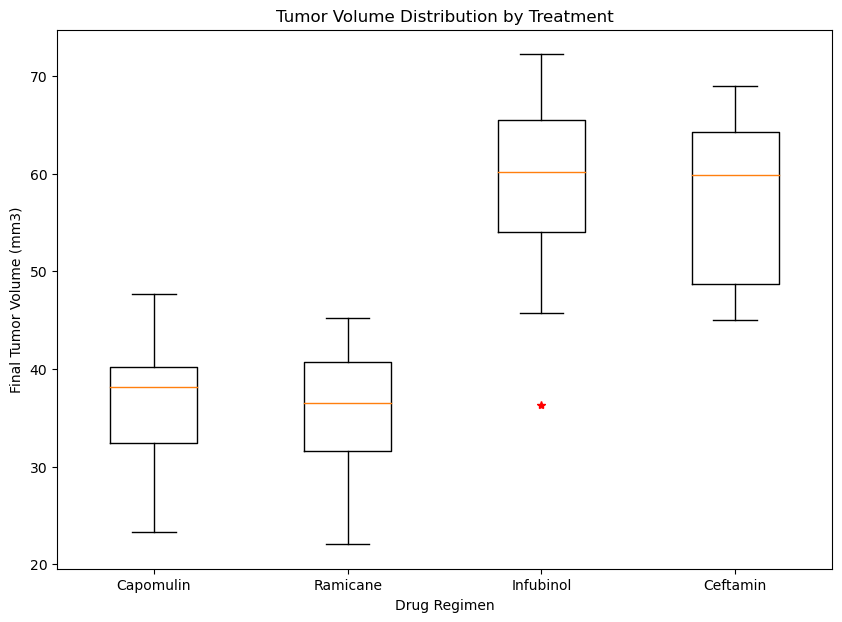

In [19]:
# Generating a box plot of the tumor volume for each treatment group

# Setting up the plot
plt.figure(figsize=(10, 7))
plt.boxplot(tumor_vol_data, labels=treatments, sym='r*')

# Adding title and labels
plt.title('Tumor Volume Distribution by Treatment')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')

# Displaying the plot
plt.show()

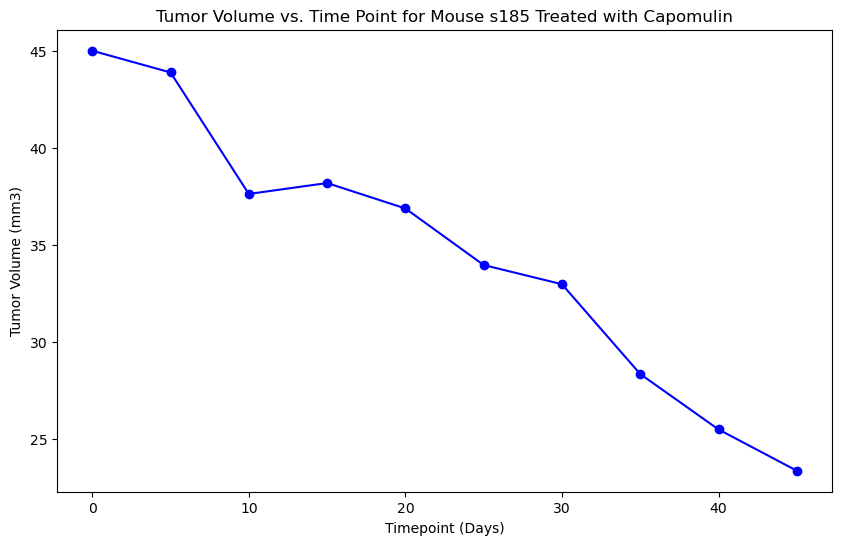

In [20]:
# Selecting a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mouse_id = capomulin_data['Mouse ID'].iloc[0]  

# Extracting data for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Generating a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='blue', linestyle='-', markersize=6)

# Adding title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Displaying the plot
plt.show()

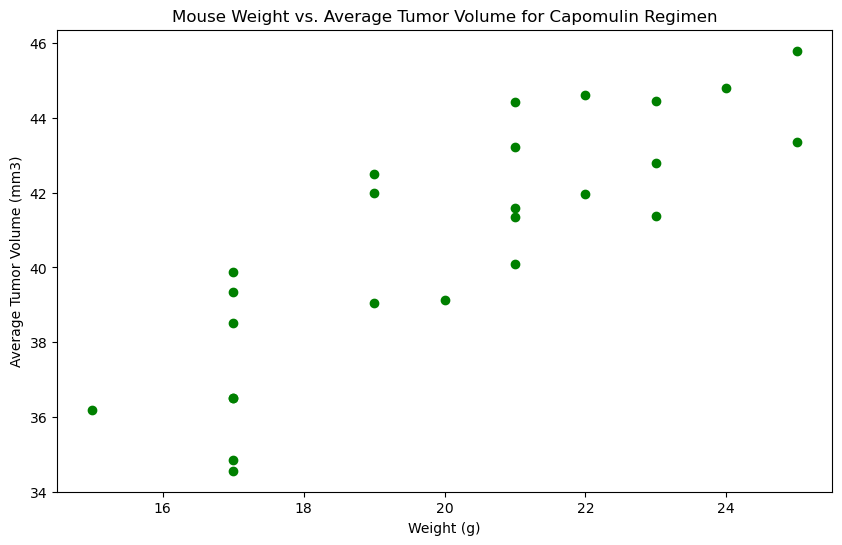

In [21]:
# Calculating the average tumor volume for each mouse in the Capomulin regimen
capomulin_avg = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')
)

# Generating a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg['Weight'], capomulin_avg['Average_Tumor_Volume'], color='green')

# Adding title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Displaying the plot
plt.show()

In [22]:
#Calculating the average tumor volume for each mouse in the Capomulin regimen
capomulin_grouped = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')
).reset_index()

# Calculating the correlation coefficient between mouse weight and average tumor volume
correlation_coefficient = capomulin_grouped['Weight'].corr(capomulin_grouped['Average_Tumor_Volume'])

correlation_coefficient

0.8419363424694722

C:\Users\nickn\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


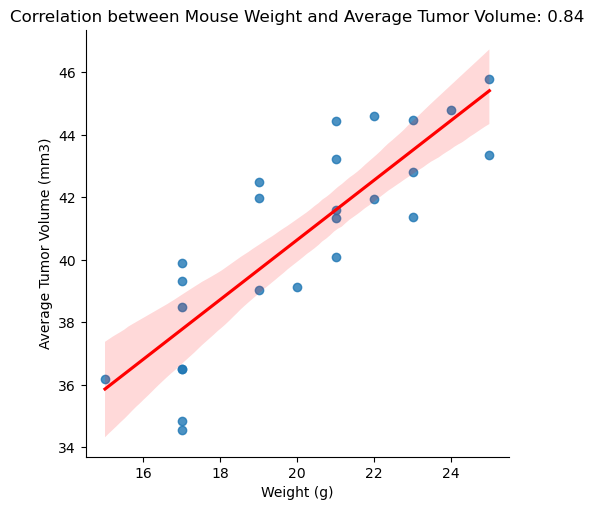

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

capomulin_grouped = capomulin_data.groupby('Mouse ID').agg(
    Average_Tumor_Volume=('Tumor Volume (mm3)', 'mean'),
    Weight=('Weight (g)', 'mean')
).reset_index()

capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']

# Use Seaborn to plot the scatter plot and regression line
sns.lmplot(x='Weight', y='Average_Tumor_Volume', data=capomulin_grouped, line_kws={'color': 'red'})

# Add title and labels
plt.title(f'Correlation between Mouse Weight and Average Tumor Volume: {correlation_coefficient:.2f}')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()